# Usage Guide : pygtm
## physical domain

In [1]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
sys.path.insert(0, '../')
from pygtm.physical import physical_space

# Parameters
- T: Transition time [day]
- spatial_dis : number of bin in the the meridional direction (the number in the zonal direction is fixed to have almost square bin)
- lon : min and max longitude value of the initial domain
- lat : min and max latitude value of the initial domain

In [3]:
T = 5  # transition time [days]
spatial_dis = 75
lon = [-98, 35]
lat = [-10, 80]

# We can already create the spatial domain structures
- nx: number of points on the meridional direction
- ny: number of points of the zonal direction 
- N0: number of initial bin in the domain
- bins ([N0, 4]): each bin or cell of the domain, every row contains the indices in the coords array of the four points forming this cell
- coords ([nx*ny,2]): coordinates (longitude, latitde) of each points on the domain
- id ([ny-1, nx-1]): rectangle with the indices of each elements on the initial domain

In [4]:
# create the grid and bins
d = physical_space(lon, lat, spatial_dis)

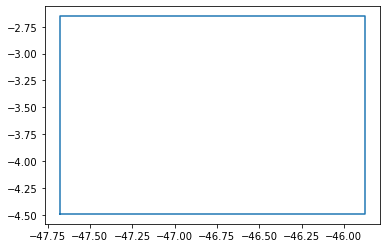

In [5]:
# for example to plot 1 element
el_id = 250
b1 = d.bins[el_id]

# reorder (0, 1, 3, 2, 0) for a close loop
b1 = b1[np.array([0,1,3,2,0])]

plt.plot(d.coords[b1,0], d.coords[b1,1])

# the domain is initially defined on a square region as followed
- total number of bins len(d.bins) (d.nx bins x d.ny)
- longitude range d.lon
- latitude range d.lat

## Note: the function d.vector_to_matrix(value_to_plot) transform a vector into the shape of the domain to be plot using pcolormesh().

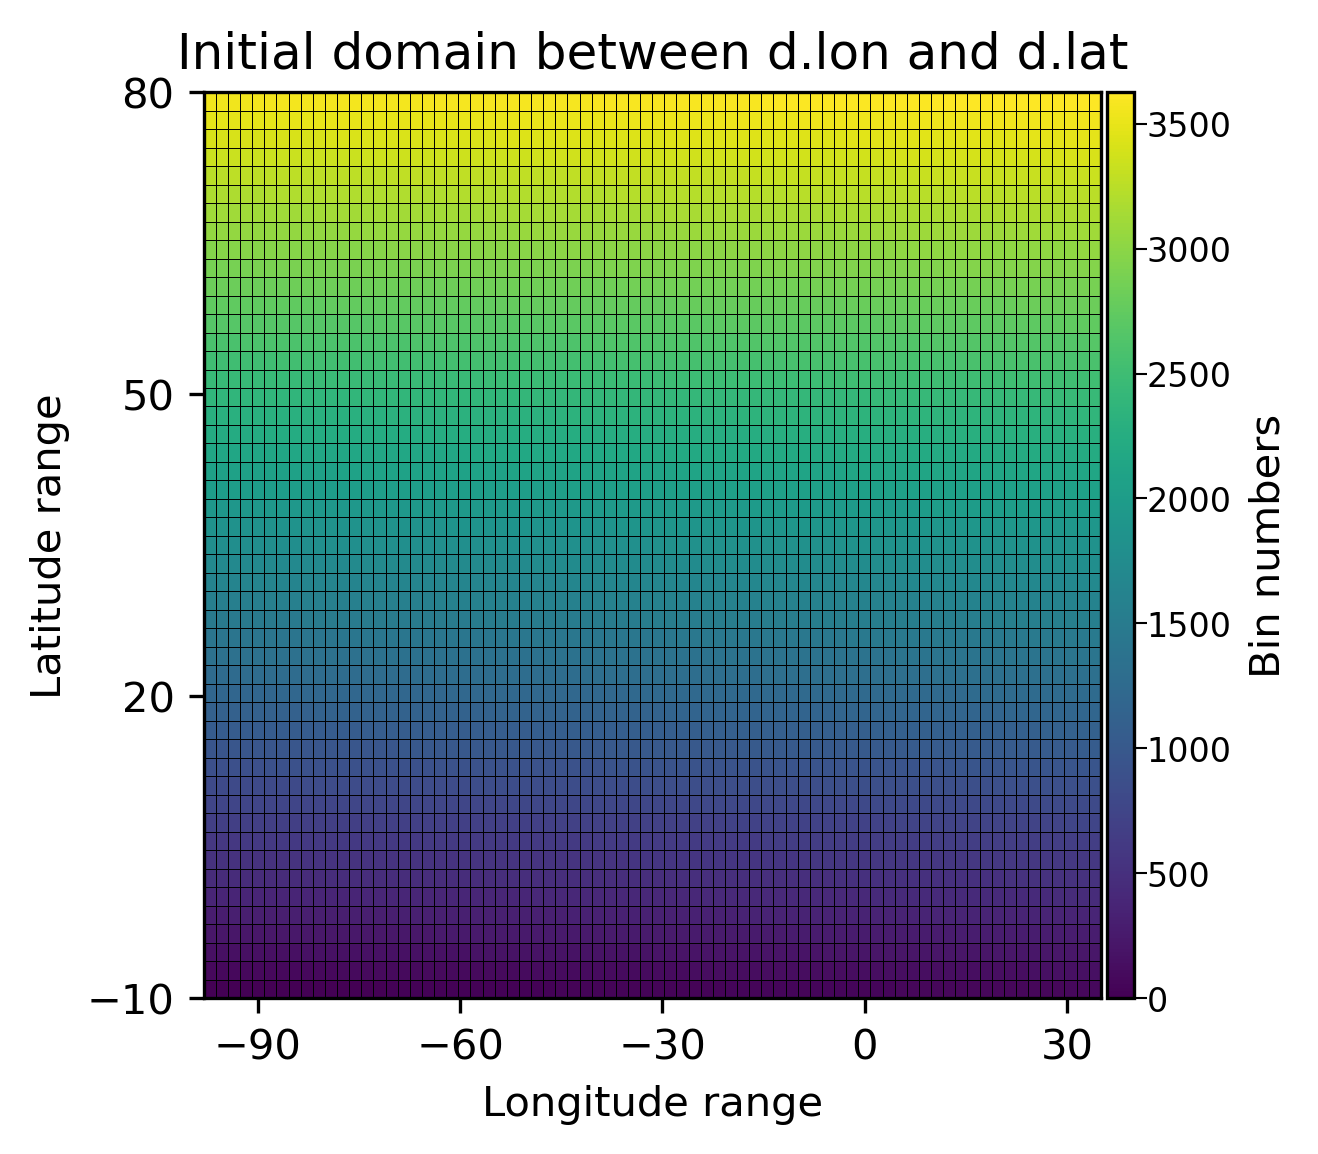

In [6]:
# plot from 0:len(d.bins) to show the order of the bins number
fig = plt.figure(figsize=(4, 4), dpi=300)
ax = fig.add_subplot(1, 1, 1)
p = ax.pcolormesh(d.vx, d.vy, d.vector_to_matrix(np.arange(0, len(d.bins))))
p.set_clim([0, len(d.bins)])
# available function to plot the boundaries of each bin
d.bins_contour(ax)
# colorbar's magic
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.02, axes_class=plt.Axes)
cb = fig.colorbar(p, cax=cax)
cb.ax.tick_params(which='major', labelsize=8, length=3, width=0.5, pad=0.05)
cb.set_label('Bin numbers')
ax.set_xticks([-90, -60, -30, 0, 30])
ax.set_yticks([-10, 20, 50, 80])
ax.set_xlabel('Longitude range')
ax.set_ylabel('Latitude range')
ax.set_title('Initial domain between d.lon and d.lat');

## Once the transition matrix is calculated, the empty bins are removed automatically. See other notebook.